In the [previous](https://kvsingh.github.io/lp-music.html) blog post, we saw how Linkin Park's musical style changed over the years, by looking at the mean and variation of audio features of their songs. In particular, we looked at 4 audio features - duration, energy, loudness, and valence. In this post, we'll try to encapsulate 2 of those features (**energy and valence**) into a new label, known as the "mood" of a song, and see how the general mood of their albums changed with the albums. You don't need to read the previous post to understand this one. Again, if you're not a programmer, don't worry, you can gain value from this post by ignoring the code and focussing on the insights.

The code for this post is available at [this github repository](https://github.com/kvsingh/linkin-park-analysis).

Before we start the analysis, though, let me try to articulate what I mean when I say "mood" of a song.

## Mood and Music

If you are anything more than a casual listener of music, you will find a strong correlation between a song and the specific emotions it invokes in you. **Some skilled listeners might even experience using music as a tool to manipulate or "hack" their emotions** - listening to a particular song to switch from one mood to the next. For example - playing an **energetic** song when they're feeling lethargic, to get some momentum and start doing things. Or, after a long day at work, putting on some **"peaceful"** music to switch from a hyper-focused state to a more relaxed state of mind. **"Somber" or "neutral"** music is usually considered to be suited to listening while working.

## Dataset

We'll be using the [Gracenote Music Web API](https://developer.gracenote.com/web-api) to get the "mood" information for Linkin Park's songs. [This blog post](http://www.gracenote.com/computing-musical-mood-at-gracenote/) contains more detailed information on the algorithms behind the classification of the mood of each song. For the purpose of this post, though, you can just consider that some very cool people have labeled the "mood" of almost every song known. We will be using a subset of 9 moods, of the 25 moods used by Gracenote:

* Peaceful
* Sentimental
* Upbeat
* Sensual
* Serious
* Somber
* Exciting
* Energizing
* Aggressive

[Here](https://github.com/kvsingh/linkin-park-analysis/blob/master/get-data.ipynb) is the script I used to get all the data, using Spotify Web API's python wrapper - [Spotipy](https://github.com/plamere/spotipy) and Gracenote web API's python wrapper - [pygn](https://github.com/cweichen/pygn).

## Introductory Analysis

We start by looking at what data we have available, and the frequencies of moods in LP's songs.

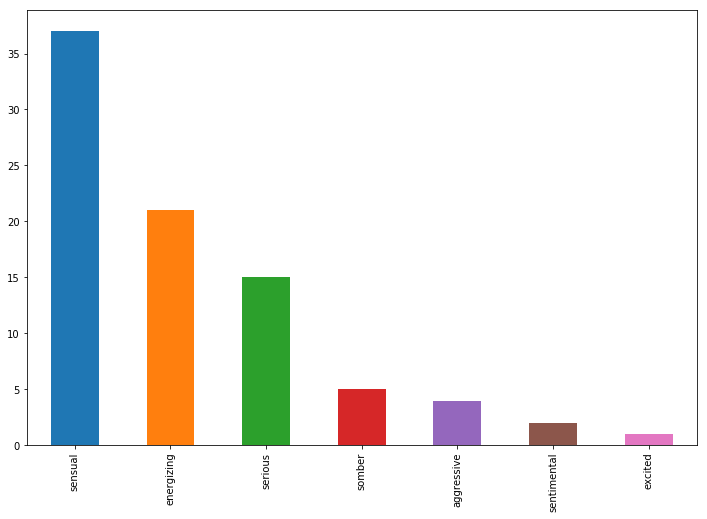

In [49]:
data = pickle.load(open('lp-data-moods.p', 'rb'))
data.mood.value_counts().plot(kind='bar')

As we can see, most of LP's songs come in the "Sensual" mood category, with "Energizing" and "Serious" being the second and third most popular moods. Some examples of sensual songs are **"Shadow of the Day", "Somewhere I Belong" and "Crawling"**. **"Faint"** is an example of an energizing song, while **"The Little Things Give You Away"** comes under the "serious" category.

## Mood Taxonomoy based on Arousal-Positivity scale

Here, I'm going to refer to some super interesting work done by [Ting Neo](https://github.com/neokt) on [Music Mood Clasification](https://neokt.github.io/projects/audio-music-mood-classification/). She defines these moods on an **arousal-positivity** scale. Essentially, moods are defined using 2 axis - **Arousal**, and **Positivity**. Her modeling of the 25 Gracenote moods is done by having 5 separate classes for each axis. Since I have narrowed it down to 9 moods, we'll be having 3 classes on each scale. This is how it looks like:

![Moods](images/moodss.png "Moods")

Arousal is an indication of how Energetic or Calm the music is, while positivity is self-explanatory. These can be considered analogous to the **"energy" and "valence"** features I mentioned in the last blog post.

## LP's albums on Arousal-Positivity scale

Analyzing the moods of individual songs in the albums can get complicated real quick since there are 9 moods and 7 albums. Instead, let's try to represent the albums on the arousal-positivity scale, by looking at the average values of arousal and positivity for each album's songs. Let's create 2 mappings from each mood - one mapping the mood to the level of arousal, and the other, to the level of positivity.

In [5]:
mood_positiveness = {
    'peaceful' : 1, 'upbeat' : 1, 'excited': 1,
    'sentimental' : 0, 'sensual' : 0, 'energizing' : 0,
    'somber' : -1, 'serious': -1, 'aggressive' : -1
}
mood_energeticness = {
    'excited' : 1, 'energizing' : 1, 'aggressive': 1,
    'upbeat' : 0, 'sensual' : 0, 'serious' : 0,
    'peaceful' : -1, 'sentimental': -1, 'somber' : -1
}
data['positiveness'] = data.mood.apply(lambda a: mood_positiveness[a])  
data['energeticness'] = data.mood.apply(lambda a: mood_energeticness[a])  

Now, we'll plot LP's albums on the arousal-positivity scale.

In [ ]:
b = data.groupby('album')['positiveness', 'energeticness'].mean()
fig, ax = plt.subplots()
b.plot('energeticness', 'positiveness', kind='scatter', ax=ax, color='k')
for k, v in b.iterrows():
    ax.text(v['energeticness'], v['positiveness'], k)

![LP-Moods](images/lp-moods.png "LP-Moods")

Hybrid Theory and Meteora seem to be **"Medium"** energy albums, with less depth in the themes they try to cover. Hence, their positiveness is greater than the other albums, in spite of dealing with dark "negative" themes. **Hunting Party** was similar in the sense of being "medium" energy, but had more depth in the negative themes. Overall it seems to be an **"Energizing"** album. Minutes to Midnight, One More Light, and Living Things are all **"Sensual"** albums. A Thousand Suns seems to be the outlier here. It is also the only **"Serious"** LP album. I would like to point out that these mood definitions are not the exact mood definitions provided by Gracenote - they are merely given by me, based on Ting Neo's model of the arousal-positivity scale (by using a threshold of 0.5 and -0.5 on that scale).

Let's see if this way of representing the albums agrees with Gracenote's mood labels, by looking at the most commonly occurring mood in each album:

In [4]:
data.groupby('album')['mood'].agg(lambda x: x.value_counts().index[0])

album
Huntingparty    energizing
Hybrid             sensual
Livingthings       sensual
Meteora            sensual
Minutes            sensual
Onemorelight       sensual
Thousandsuns       serious
Name: mood, dtype: object

Well, looks like it does. Which doesn't say much, other than that the arousal-positivity model, using a threshold of 0.5 and -0.5, is a nice way of representing the moods defined by Gracenote.

## Conclusion

In this blog post, we looked at the concept of mood-based listening. As an example, we analyzed LP's albums and the moods they invoke.

I have been working on a web app, where you can create mood-based playlists on top of your Spotify library. The playlists can be curated according to the level of novelty or newness you are looking for, in your playlist. Based on that parameter, it creates a playlist with a customized ratio of songs in your library, versus songs which you haven't heard.

I will be introducing this app in the next blog post. Thanks for reading.